# Knowledge Representation

## Einführung
In dieser Aufgabe wird eine RDFS-Ontologie erstellt, die die gescrapten Spielerinnendaten aus dem Volleyball-Damenkader modelliert. Die Ontologie umfasst Klassen und Eigenschaften mit ihren jeweiligen Hierarchien sowie die Definition von Domains und Ranges. Anschließend werden die Daten in RDF umgewandelt und in einem lokalen Triple-Store gespeichert.

## Arbeitsaufteilung
* **Cesar Laura**: RDFize Extracted Data
* **Dilly Julian**: Speicherung in Triple Store
* **Ecker Annina**: Strukturierung und Erstellen der Ontologie


### Installation und Importieren der benötigten Libraries

In [9]:
#!pip install -r requirements.txt

In [10]:
from owlready2 import *
from rdflib import Graph, Literal, RDF, RDFS, Namespace, URIRef
from rdflib.namespace import FOAF, XSD
import pandas as pd

---

### 1. Struktur der Spielerinnendaten
#### 1.1 Classes

* #### **Person**: Allgemeine Klasse für Menschen
  * ##### **Name**: Repräsentiert den Namen einer Person
  * ##### **Athlete**: Subklasse von Person, die Sportler:innen repräsentiert
    * ##### **VolleyballPlayer**: Subklasse von Athlete für Volleyballspielerin
        * ###### **JerseyNumber**: Nummer einer Spielerin im Team
        * ###### **Height**: Körpergröße einer Person
* ##### **Position**: Repräsentiert die Position einer Spielerin im Team
* ##### **Nationality**: Repräsentiert die Herkunft einer Person
* ##### **Team**: Repräsentiert das Team, zu dem die Spielerinnen gehören


#### Begründung der Struktur:
Die Klasse `Person` enthält die Eigenschaft `Name`, da jede Person einen Namen besitzt.<br>
`Athlete` als Subklasse von Person wurde gewählt, da nicht jede Person Athlet:in ist, aber alle Athlet:innen Personen sind.<br>
`VolleyballPlayer` kann als Subklasse von `Athlete` genommen werden, wobei `JerseyNumber` und `Height` sich dann auf die Eigenschaften von Volleyballspieler:innen bezieht.<br>
`Position` als eigenständige Klasse ist sinnvoll, da eine Spielerin eine Position einnimmt, aber keine Eigenschaft von ihr als Person ist. Darüber hinaus kann die Position unabhängig davon modelliert und angepasst werden. Zudem kann durch diese Verwendung `Position` standardisiert werden, wodurch Redundanzen und Fehler leichter vermieden werden können.<br>
`Nationality` kann zwar als Subklasse von Personen verwendet werden, macht aber bei einer Ontologie aus den folgenden Gründen als eigenständige Klasse mehr Sinn:
- Wiederverwendbarkeit und single point of truth -> Nationalitäten können zentral gepflegt und von dort aus auf Personen verwiesen werden
- Verhindert dadurch Inkonsistenzen in der Schreibweise
- Einfache Erweiterbarkeit durch zB Hinzufügen eines Ländercodes, Kontinents oder anderen Informationen
- Andere Verknüpfungen zwischen Ländern und Entitäten sind einfacher möglich

`Team` kann unabängig der Spielerinnen verwaltet werden als eigenständige Klasse, was vorteilhaft ist, wenn Spielerinnen sich ändern oder das Team umstrukturiert wird.

#### 1.2 Properties

* ##### **hasPosition**: Beziehung zwischen einer Volleyballspielerin und einer Position im Feld
* ##### **hasNationality**: Beziehung zwischen einer Volleyballspielerin und ihrer Nationalität
* ##### **hasHeight**: Beziehung zwischen einer Volleyballspielerin und ihrer Körpergröße
* ##### **playsFor**: Verbindet Spielerin mit einem Team
* ##### **hasJerseyNumber**: Beziehung zwischen Spielerin und Dressnummer
* ##### **isPartOfTeam**: Beziehung einer Spielerin mit dem zugehörigen Team
* ##### **hasName**: Beschreibt den Namen einer Person

#### 1.3 Domains and Ranges

* ##### **hasPosition**: **Domain** = VolleyballPlayer, **Range** = Position
* ##### **hasNationality**: **Domain** =  Volleyballplayer, **Range** = Nationality
* ##### **hasHeight**: **Domain** = Volleyballplayer, **Range** = Height (in cm)
* ##### **playsFor**: **Domain** = VolleyballPlayer, **Range** = VolleyballTeam
* ##### **hasJerseyNumber**: **Domain** = VolleyballPlayer, **Range** = JerseyNumber
* ##### **isPartOfTeam**: **Domain** = VolleyballPlayer, **Range** = Team
* ##### **hasName**: **Domain** = Person, **Range** = Name

---

### 2. Implementierung der RDFS Ontology
#### 2.1 Erstellen einer temporären IRI (internationalized resource identifier)

In [11]:
graph = Graph()
# Erstellung des Volleyball Namespaces = vbn
# Beispiel: Klasse 'vbn.VolleyballPlayer' wird in RDF zu 'http://example.org/volleyball#VolleyballPlayer'
vbn = Namespace("http://example.org/volleyball#")
graph.bind("vbn", vbn)


#### 2.2 Definieren von Classes & Class Hierarchies, Properties und Property Hierarchies, Domains und Ranges

In [12]:
# Classes
graph.add((vbn.Person, RDF.type, RDFS.Class))
graph.add((vbn.Athlete, RDF.type, RDFS.Class))
graph.add((vbn.VolleyballPlayer, RDF.type, RDFS.Class))
graph.add((vbn.Team, RDF.type, RDFS.Class))
graph.add((vbn.Position, RDF.type, RDFS.Class))
graph.add((vbn.Nationality, RDF.type, RDFS.Class))

# Class Hierarchies
graph.add((vbn.Athlete, RDFS.subClassOf, vbn.Person))
graph.add((vbn.VolleyballPlayer, RDFS.subClassOf, vbn.Athlete))


<Graph identifier=Nfff03707a5e7451c891485bfa6cf90cc (<class 'rdflib.graph.Graph'>)>

In [13]:
# Definieren der Properties, der Domains und Ranges

graph.add((vbn.hasName, RDF.type, RDF.Property))
graph.add((vbn.hasName, RDFS.domain, vbn.Person))
graph.add((vbn.hasName, RDFS.range, RDFS.Literal))

graph.add((vbn.hasPosition, RDF.type, RDF.Property))
graph.add((vbn.hasPosition, RDFS.domain, vbn.VolleyballPlayer))
graph.add((vbn.hasPosition, RDFS.range, vbn.Position))

graph.add((vbn.hasNationality, RDF.type, RDF.Property))
graph.add((vbn.hasNationality, RDFS.domain, vbn.Person))
graph.add((vbn.hasNationality, RDFS.range, vbn.Nationality))

graph.add((vbn.hasHeight, RDF.type, RDF.Property))
graph.add((vbn.hasHeight, RDFS.domain, vbn.VolleyballPlayer))
graph.add((vbn.hasHeight, RDFS.range, RDFS.Literal))

graph.add((vbn.hasJerseyNumber, RDF.type, RDF.Property))
graph.add((vbn.hasJerseyNumber, RDFS.domain, vbn.VolleyballPlayer))
graph.add((vbn.hasJerseyNumber, RDFS.range, RDFS.Literal))

graph.add((vbn.playsFor, RDF.type, RDF.Property))
graph.add((vbn.playsFor, RDFS.domain, vbn.VolleyballPlayer))
graph.add((vbn.playsFor, RDFS.range, vbn.Team))


<Graph identifier=Nfff03707a5e7451c891485bfa6cf90cc (<class 'rdflib.graph.Graph'>)>

In [14]:
# Abspeichern der Ontologie als Turtle-File

graph.serialize("volleyball_ontology.ttl", format="turtle")

<Graph identifier=Nfff03707a5e7451c891485bfa6cf90cc (<class 'rdflib.graph.Graph'>)>

In [15]:
print(graph)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


---

### 3. Competency Questions

Die folgenden Fragen wurden für die weitere Entwicklung der Ontologie erstellt:<br>
- Welche Spielerinnen spielen auf der Position "Libero"?
- Welche Spielerinnen kommen aus Österreich?
- Was sind die Körpergrößen und Dressnummern aller Spielerinnen in einem bestimmten Team?

---

### 4. RDFize Extracted Data - Umwandeln der Daten in RDF

In diesem abschnitt wird wird eine RDF-Grafik erstellt die Informationen aus einer CSV-Datei mit Volleyballspielerdaten einliest und in ein RDF-Format umwandelt. Für jede Spielerin in der CSV-Datei werden individuelle URIs erstellt und die Eigenschaften (Name, Größe, Trikotnummer, Nationalität und Position) definiert. Diese Daten werden mit den entsprechenden URIs und Typen verknüpft. Ausserdem wurden das volleyball_ontology.ttl file erweitert in dem Stadion class, Team class, hasTeamName property, hasHomeStadion property, hasStadionName property und hasStadionAdress property händisch hinzugefügt wurden.

In [ ]:
df = pd.read_csv('Spielerinnendaten.csv')
g = Graph()

g.bind("vbn", vbn)
RDFS_NS = Namespace("http://www.w3.org/2000/01/rdf-schema#")
g.bind("rdfs", RDFS_NS)

team_uri = URIRef(f"http://example.org/volleyball#Nationalteam")
stadion_uri = URIRef(f"http://example.org/volleyball#ExampleStadion")

g.add((team_uri, RDF.type, vbn.Team))
g.add((stadion_uri, RDF.type, vbn.Stadion))

g.add((stadion_uri, vbn.hasStadionName, Literal("Example Stadion")))
g.add((stadion_uri, vbn.hasStadionAdress, Literal("Example Adress")))
g.add((team_uri, vbn.hasTeamName, Literal("Nationalmannschaft")))
g.add((team_uri, vbn.hasHomeStadion, stadion_uri))


for index, row in df.iterrows():
    player_uri = URIRef(f"http://example.org/volleyball#player_{index+1}")
    
    g.add((player_uri, RDF.type, vbn.VolleyballPlayer))
    g.add((player_uri, vbn.hasName, Literal(row['Name'])))
    g.add((player_uri, vbn.hasHeight, Literal(row['Groesse'])))
    g.add((player_uri, vbn.hasJerseyNumber, Literal(row['Dressnummer'])))
    g.add((player_uri, vbn.playsFor, team_uri))
    
    nationality_uri = URIRef(f"http://example.org/volleyball#nationality_{row['Nationalitaet']}")
    g.add((nationality_uri, RDF.type, vbn.Nationality))
    g.add((player_uri, vbn.hasNationality, nationality_uri))
    
    position_uri = URIRef(f"http://example.org/volleyball#position_{row['Position']}")
    g.add((position_uri, RDF.type, vbn.Position))
    g.add((player_uri, vbn.hasPosition, position_uri))
    
g.serialize(destination="volleyball_players.ttl", format="turtle")

### 5. Laden des RDF Graphs in einen Local Triple Store

Das Laden in den Triple Store wird mittels Apache Jena Fuseki erledigt.

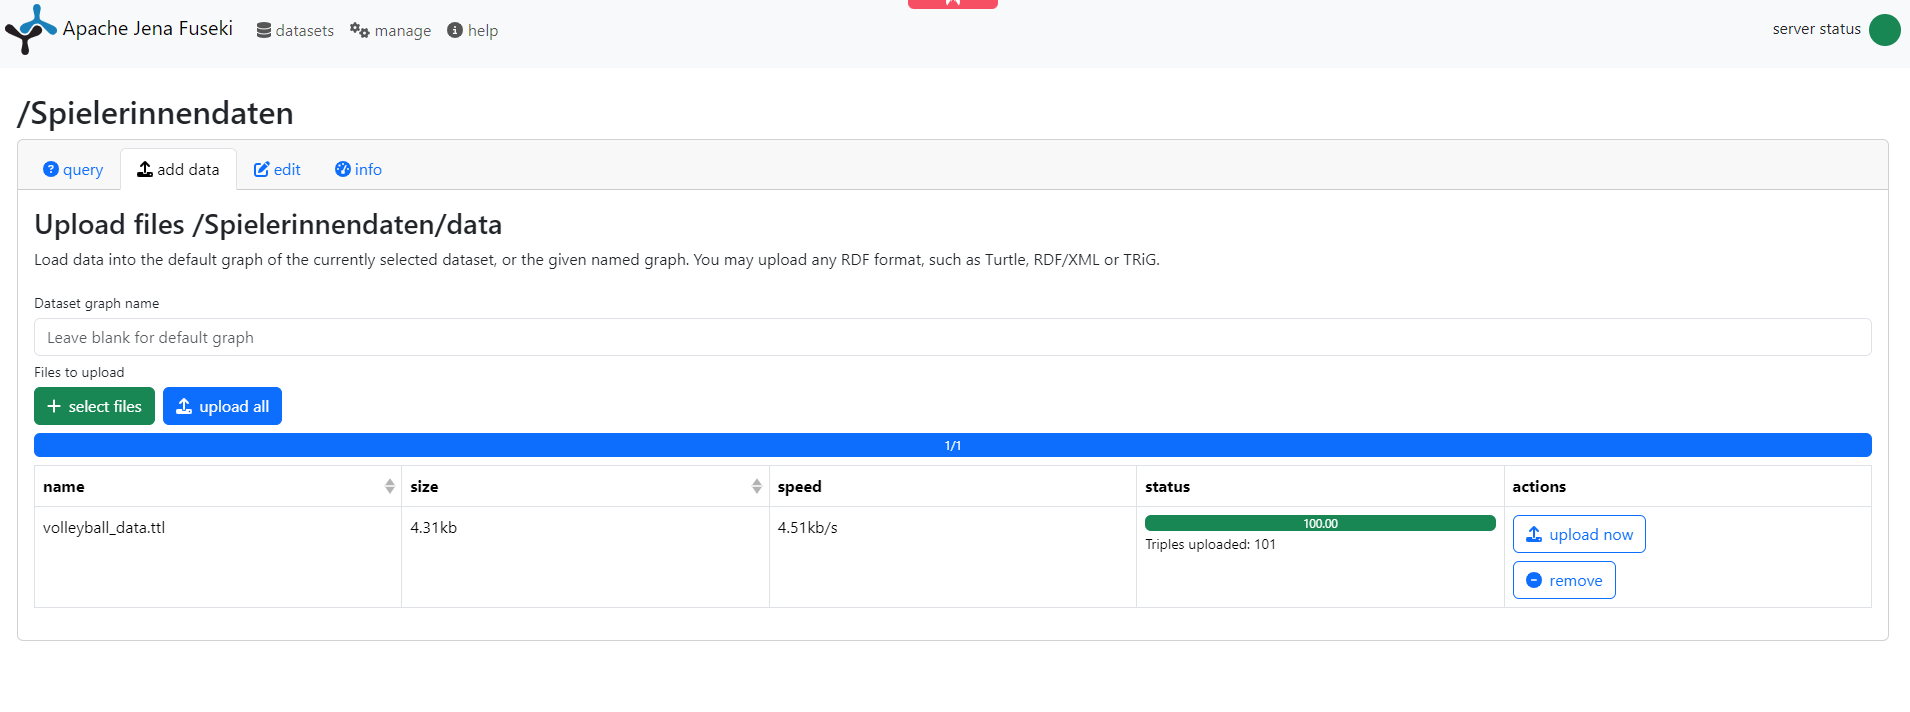

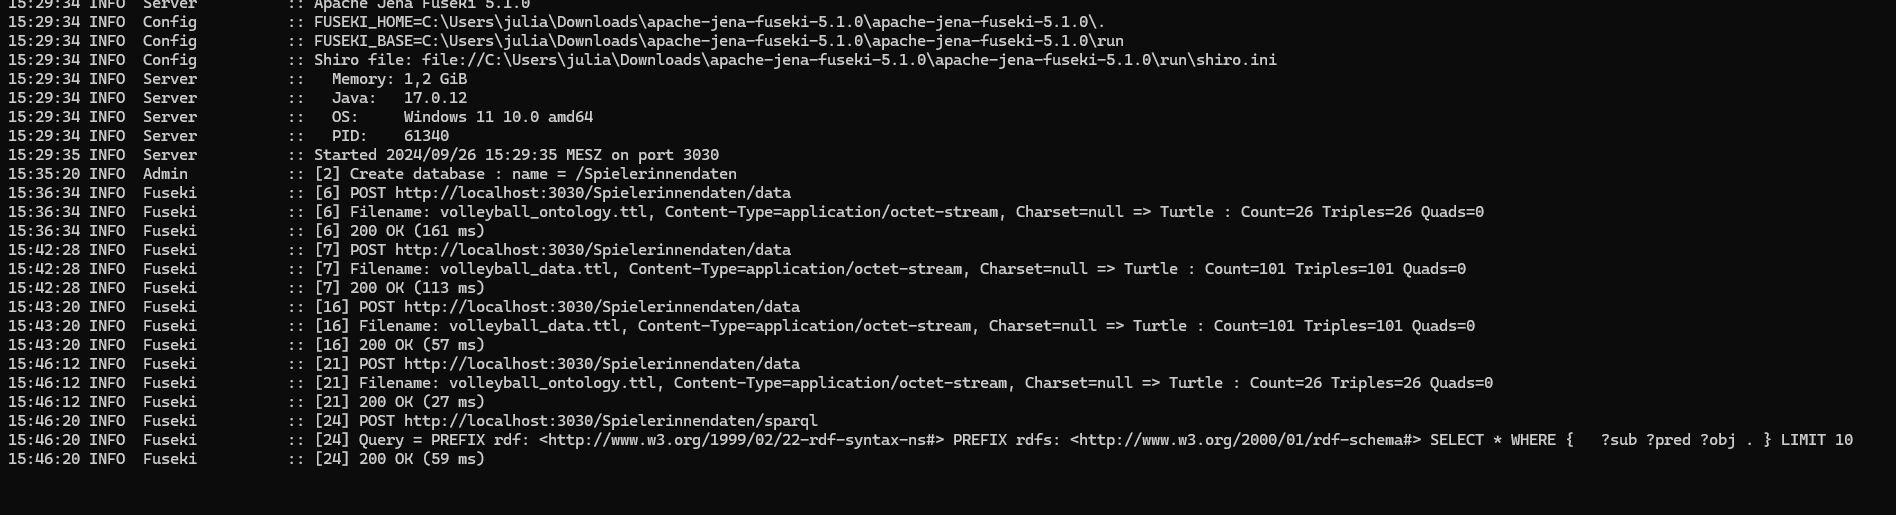

Die Queries werden mit SPARQL abfgerufen. Für die Position wird mittels des vbn Attributes von position abgerufen und gibt die 3 Spielerinnen zurück, die auch in der orginal Database enthalten sind.

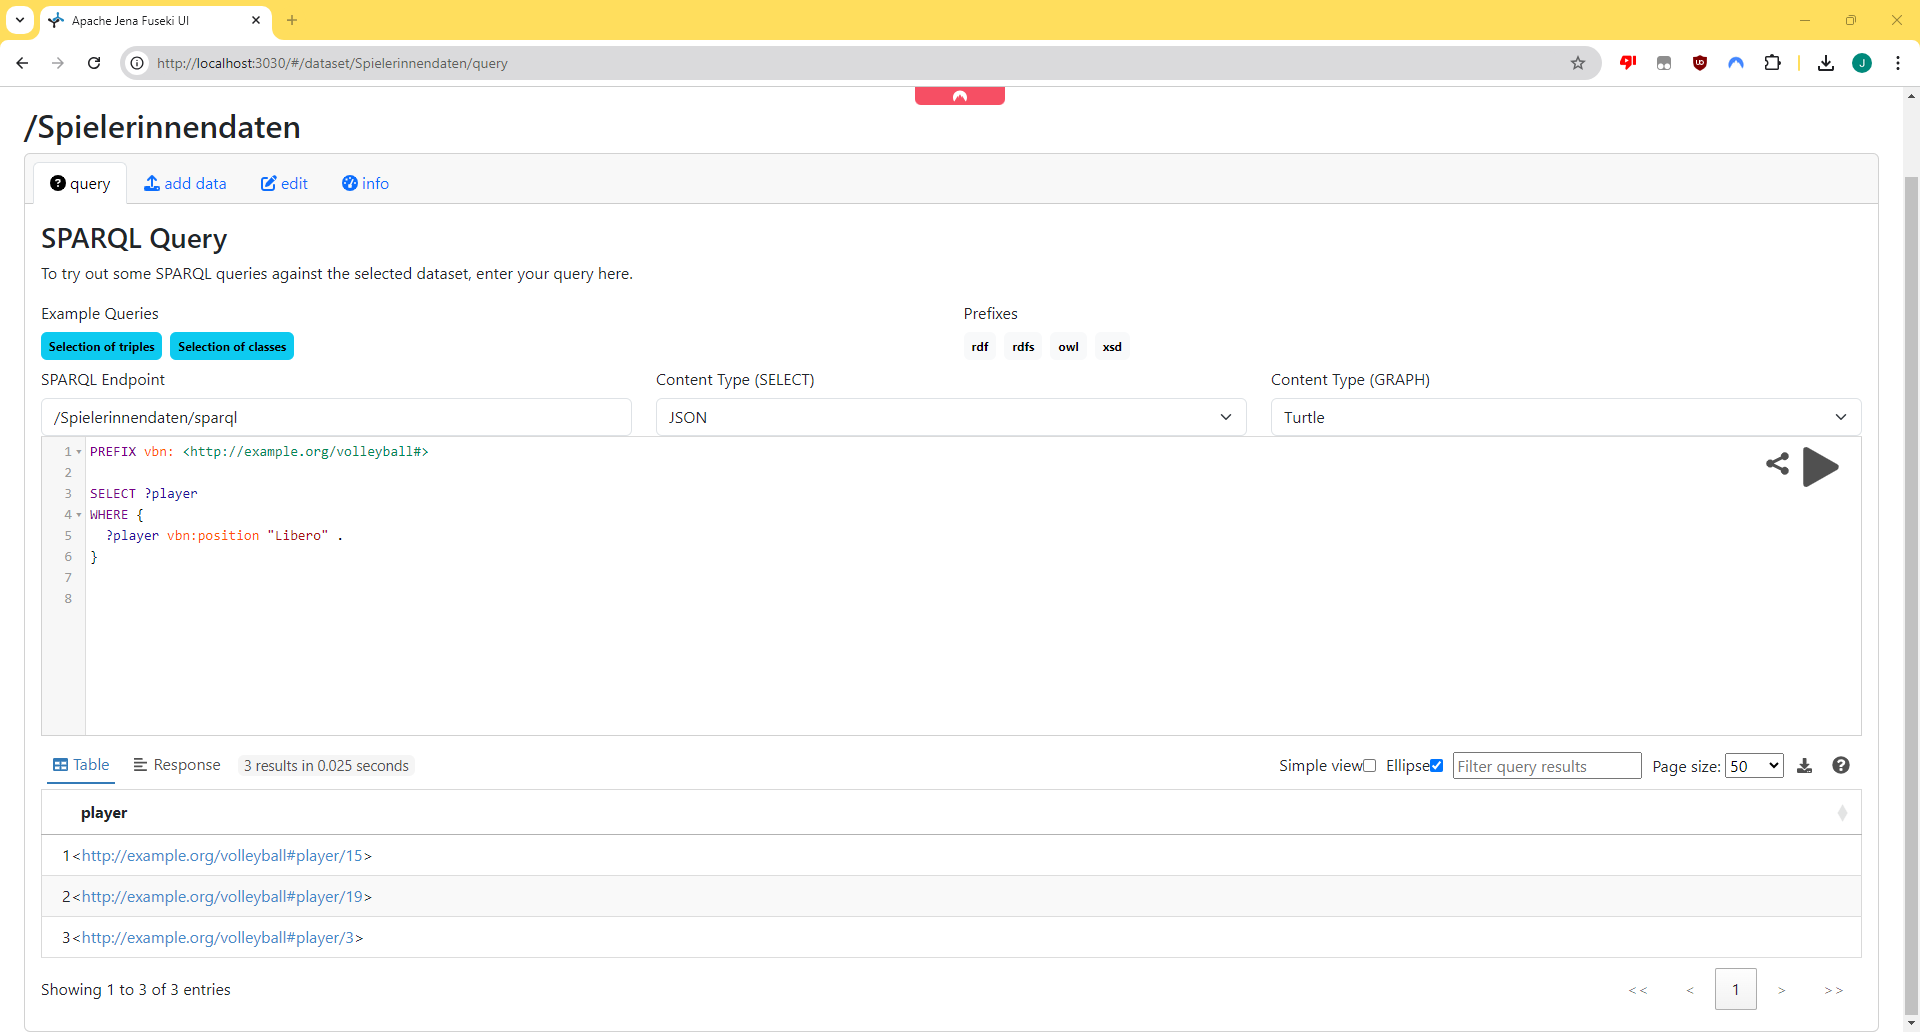

Das selbe funktioniert auch für die Attribute unter anderem auch die Nationalität. Hierbei ist jedoch zu beachten, dass die Nationalität nicht Österreich ist sondern AUT. Hier werden alle 15 Ergebnisse zurückgegeben.

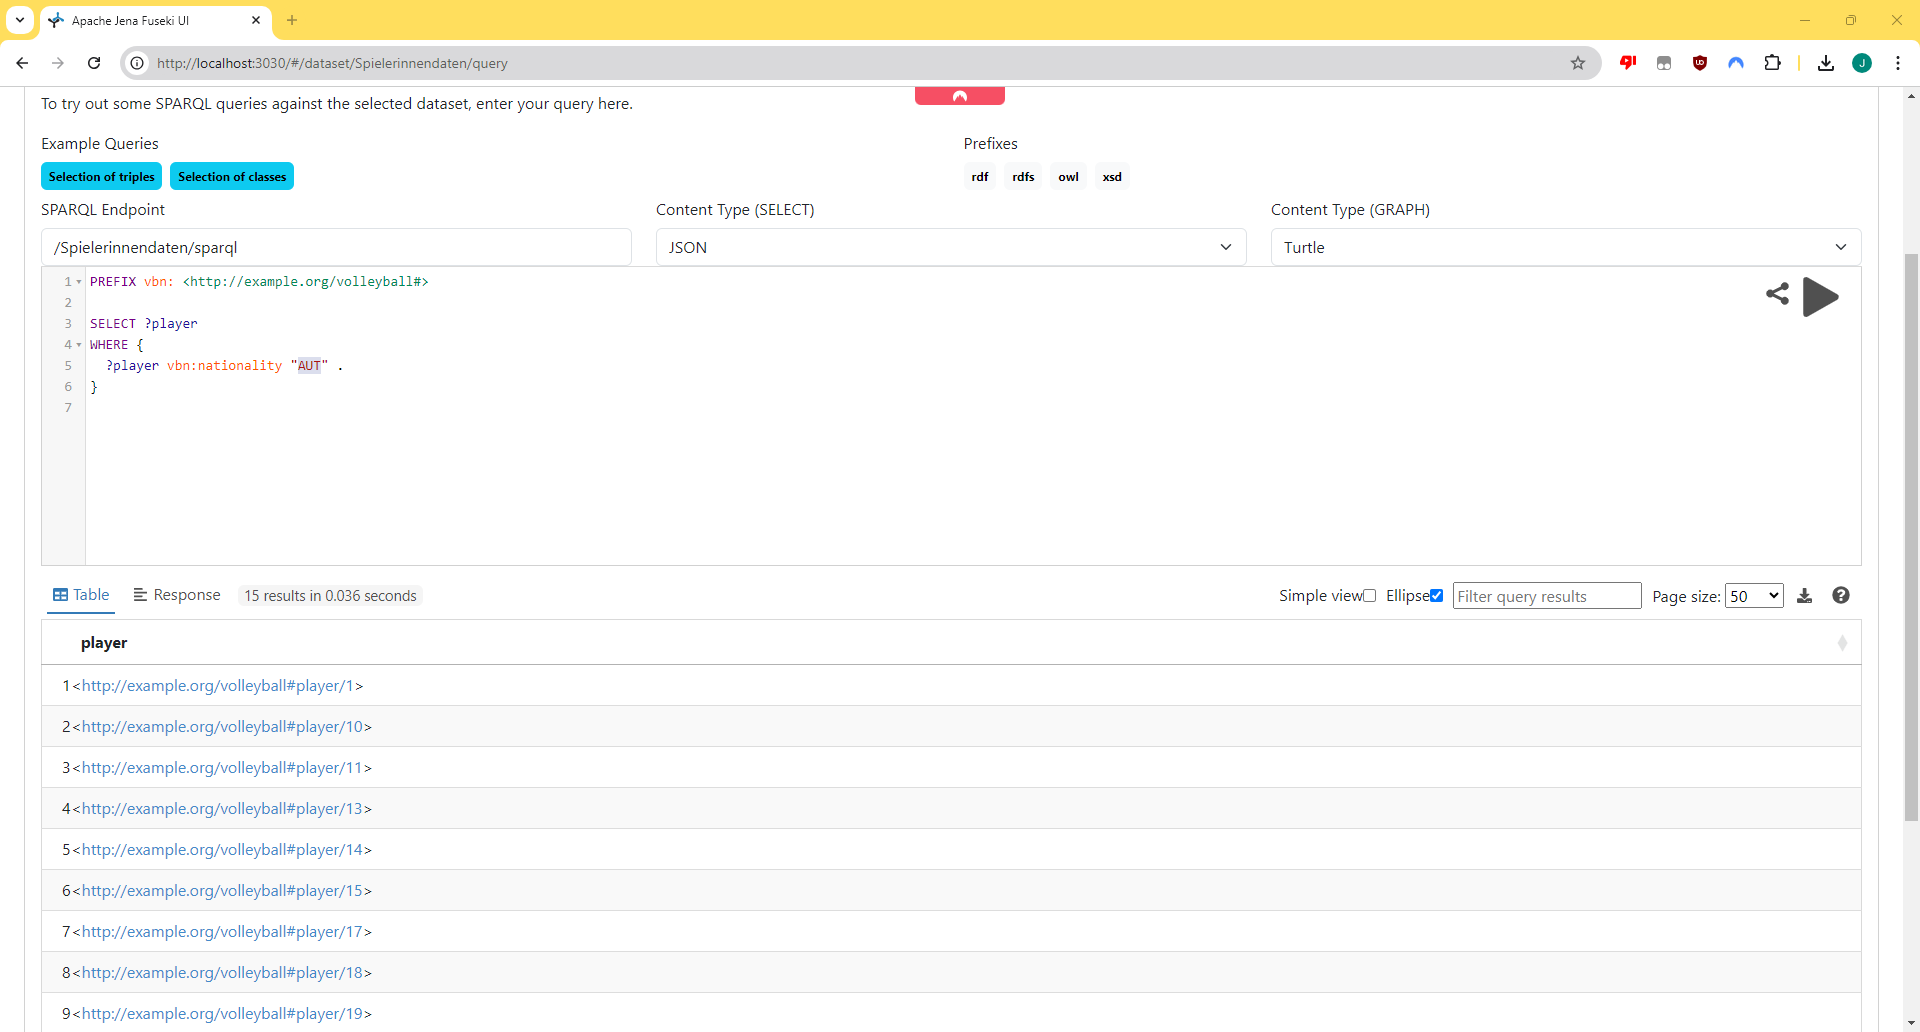

Für den Namen, da sowohl Vor- als auch Nachname enthalten sind, liefert die Abfrage nach Player keine Ergebnisse, somit muss mittels Filter und contains verwendet werden. Damit kann nur nach dem Vornamen gesucht werden.

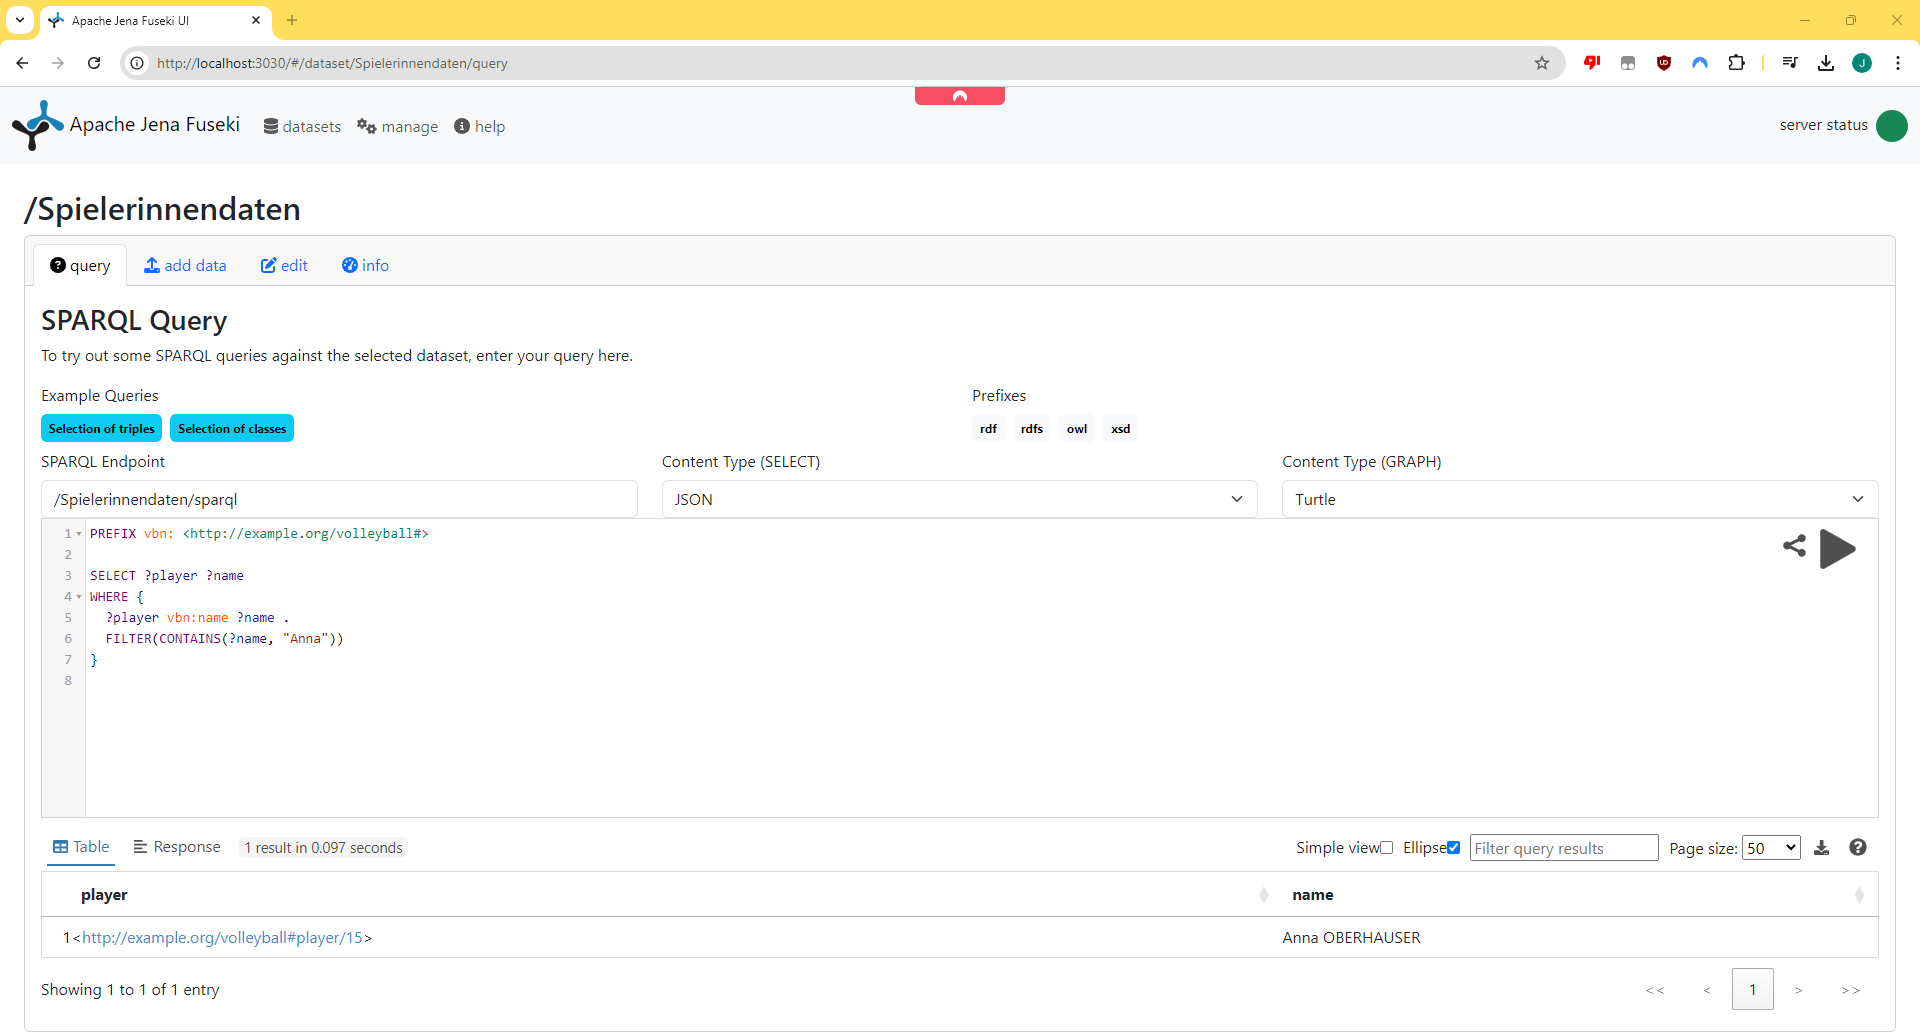

# Ressourcen & Source-Docs

## Implementierung der RDFS Ontologie
1. [Getting started with RDFLib - RDFLib Doc's](https://rdflib.readthedocs.io/en/stable/gettingstarted.html)
2. [Ontology from Scratch using Python3 - Medium](https://medium.com/@NidhiMittalHada/ontology-from-scratch-using-python3-d6831283175b)
3. [RDFLib: How to create ontology in python - StackOverflow](https://stackoverflow.com/questions/46449970/rdflib-how-to-create-ontology-in-python)


## Laden in den Triple Store
1. [Apache Jena Fuseki Tutorial](https://jena.apache.org/documentation/fuseki2/)
2. [SparQL Tutorial - Wikidata](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#SPARQL_basics)
3. [Contains Tutorial SparQL - w3](https://www.w3.org/TR/sparql11-query/#func-contains)


# Challenges bei der Implementierung


#### Cesar Laura, RDFize Extracted Data:
-Beim hinzufügen der neuen Daten (Stadion, Team) war es anfangs etwas verwirrend wie etwas verknüpft werden muss aber nach ein paar lines of code war es dann verständlich


#### Dilly Julian, Laden von Daten in Triple Store
- Die erste Schwierigkeit war es das Programm zu downloaden und zu starten, da es Probleme mit der Kompatibilität mit Java gegeben hat und es nicht so einfach war den Grund dafür herauszufinden. Weiters wird in vielen Dokumentationen als Startbefehl für den Sever nur der Linux Code angegeben. Weiters war es etwas schwierig die komplexe SPARQL Query mit dem contain auszuführen und ein Tutorial dafür zu finden.

#### Ecker Annina, Implementierung der RDFS Ontologie:
- RDFLib und generell eine Ontologie zu erstellen und implementieren war/ist neu für mich und daher musste ich zuerst die Doku lesen und mich mit der Thematik auf Coding-Ebene vertraut machen. Unser Beispiel mit dem Volleyballteam ist aber glücklicherweise nicht allzu komplex und daher gut umsetzbar gewesen :)
